## Load the dataset

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("my-experiments")

<Experiment: artifact_location='/workspaces/In-Hospital-Mortality-Prediction/experiment/mlruns/2', creation_time=1723168184620, experiment_id='2', last_update_time=1723168184620, lifecycle_stage='active', name='my-experiments', tags={}>

In [3]:
data1 = pd.read_csv("../data/dataset.csv")

In [4]:
# lets take a look at the first five rows
data1.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [5]:
data1.shape #check the number of rows and columns 

(1177, 51)

In [6]:
# lets take a look at the column list 
data1.columns

Index(['group', 'ID', 'outcome', 'age', 'gendera', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

### Data Wrangling Function

In [7]:
from sklearn.preprocessing import StandardScaler

def wrangle(df):
    df = df.copy()
    # Since this is for practice i would reduce the number of columns 
    df = df[['age', 'BMI', 'atrialfibrillation', 'Systolic blood pressure', 'Diastolic blood pressure', 'diabetes',
             'Respiratory rate', 'temperature', 'SP O2', 'Urine output', 'PT', 'INR', 'Anion gap', 'PCO2', 'PH', 'Bicarbonate',
             'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen', 'outcome']]
    
    # Create a new feature 'Hypertensive'
    df['Hypertensive'] = (df['Systolic blood pressure'] >= 140) | (df['Diastolic blood pressure'] >= 90)
    
    # Interaction feature
    df['age_BMI'] = df['age'] * df['BMI']
    
    # Categorical binning
    age_bins = [0, 30, 60, 100]
    age_labels = ['young', 'middle-aged', 'elderly']
    df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)
    
    bmi_bins = [0, 18.5, 24.9, 29.9, np.inf]
    bmi_labels = ['underweight', 'normal', 'overweight', 'obese']
    df['BMI_category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels)
    
    # Log transformations
    df['Creatine kinase_log'] = np.log1p(df['Creatine kinase'])
    
    # One-hot encoding
    df = pd.get_dummies(df, columns=['atrialfibrillation', 'diabetes', 'age_group', 'BMI_category'], drop_first=True)
    
    # Scaling
    scaler = StandardScaler()
    df[['age', 'BMI', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2', 'Urine output', 'INR', 'PH', 'Bicarbonate', 'NT-proBNP', 'Creatine kinase', 'Urea nitrogen']] = scaler.fit_transform(df[['age', 'BMI', 'Systolic blood pressure', 'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2', 'Urine output', 'INR', 'PH', 'Bicarbonate', 'NT-proBNP', 'Creatine kinase', 'Urea nitrogen']])
    
    return df

In [8]:
df = wrangle(data1)

In [9]:
df.nunique()

age                           68
BMI                          933
Systolic blood pressure     1102
Diastolic blood pressure    1077
Respiratory rate            1004
temperature                  775
SP O2                        866
Urine output                 810
PT                           783
INR                          425
Anion gap                    486
PCO2                         464
PH                           413
Bicarbonate                  657
NT-proBNP                   1147
Creatine kinase              691
Creatinine                   729
Urea nitrogen                925
outcome                        2
Hypertensive                   2
age_BMI                      962
Creatine kinase_log          691
atrialfibrillation_1           2
diabetes_1                     2
age_group_middle-aged          2
age_group_elderly              2
BMI_category_normal            2
BMI_category_overweight        2
BMI_category_obese             2
dtype: int64

In [10]:
#check the descriptive statistics
df.describe()

,age,BMI,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,PT,INR,...,PCO2,PH,Bicarbonate,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,outcome,age_BMI,Creatine kinase_log
count,1177.000000,9.620000e+02,1.161000e+03,1.161000e+03,1.164000e+03,1.158000e+03,1.164000e+03,1.141000e+03,1157.000000,1157.000000,...,883.000000,8.850000e+02,1.177000e+03,1.177000e+03,1.012000e+03,1177.000000,1.177000e+03,1176.000000,962.000000,1012.000000
mean,0.000000,5.170269e-17,4.100462e-16,-1.224018e-16,1.495558e-16,4.945574e-15,-4.028851e-16,-1.556842e-17,17.481057,0.000000,...,45.535382,2.729769e-16,-2.354390e-16,6.338741e-17,-3.510587e-18,1.642846,5.131362e-17,0.135204,2177.429352,4.603595
std,1.000425,1.000520e+00,1.000431e+00,1.000431e+00,1.000430e+00,1.000432e+00,1.000430e+00,1.000439e+00,7.386988,1.000432,...,12.711271,1.000565e+00,1.000425e+00,1.000425e+00,1.000494e+00,1.279651,1.000425e+00,0.342087,583.977452,1.074967
min,-4.099924,-1.806803e+00,-2.476653e+00,-3.258183e+00,-2.415130e+00,-5.643518e+00,-8.862040e+00,-1.493370e+00,10.100000,-0.904470,...,18.750000,-4.288376e+00,-2.720961e+00,-8.342133e-01,-1.609248e-01,0.266667,-1.416579e+00,0.000000,565.990420,2.197225
25%,-0.674336,-6.288728e-01,-7.260156e-01,-6.891882e-01,-7.187266e-01,-6.442344e-01,-5.541543e-01,-7.228119e-01,13.160000,-0.582317,...,37.038462,-6.527222e-01,-6.693143e-01,-6.667488e-01,-1.353147e-01,0.940000,-7.080352e-01,0.000000,1809.222138,3.850148
50%,0.219295,-2.012417e-01,-1.075354e-01,-1.004635e-01,-1.072670e-01,-4.362248e-02,7.808931e-02,-1.763449e-01,14.633333,-0.390397,...,43.000000,2.181740e-02,-7.971740e-02,-3.936773e-01,-1.061663e-01,1.287500,-2.578376e-01,0.000000,2120.121518,4.502580
75%,0.815050,3.696144e-01,6.123203e-01,5.552196e-01,6.472170e-01,5.676060e-01,7.159726e-01,4.723390e-01,18.800000,0.133023,...,50.585784,7.649542e-01,5.736792e-01,3.008328e-01,-4.150924e-02,1.900000,4.098283e-01,0.000000,2508.215593,5.226753
max,1.857620,8.022840e+00,4.896561e+00,4.444303e+00,5.023031e+00,4.042827e+00,1.622584e+00,5.441651e+00,71.271429,8.057541,...,98.600000,2.994365e+00,4.018128e+00,8.210700e+00,2.880512e+01,15.527273,5.743525e+00,1.000000,4897.959183,10.668688


In [11]:
#check the data type of each column and look for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1177 non-null   float64
 1   BMI                       962 non-null    float64
 2   Systolic blood pressure   1161 non-null   float64
 3   Diastolic blood pressure  1161 non-null   float64
 4   Respiratory rate          1164 non-null   float64
 5   temperature               1158 non-null   float64
 6   SP O2                     1164 non-null   float64
 7   Urine output              1141 non-null   float64
 8   PT                        1157 non-null   float64
 9   INR                       1157 non-null   float64
 10  Anion gap                 1177 non-null   float64
 11  PCO2                      883 non-null    float64
 12  PH                        885 non-null    float64
 13  Bicarbonate               1177 non-null   float64
 14  NT-proBN

In [12]:
#check for the porportion of all the null values
df.isnull().sum() / len(df)

age                         0.000000
BMI                         0.182668
Systolic blood pressure     0.013594
Diastolic blood pressure    0.013594
Respiratory rate            0.011045
temperature                 0.016143
SP O2                       0.011045
Urine output                0.030586
PT                          0.016992
INR                         0.016992
Anion gap                   0.000000
PCO2                        0.249788
PH                          0.248088
Bicarbonate                 0.000000
NT-proBNP                   0.000000
Creatine kinase             0.140187
Creatinine                  0.000000
Urea nitrogen               0.000000
outcome                     0.000850
Hypertensive                0.000000
age_BMI                     0.182668
Creatine kinase_log         0.140187
atrialfibrillation_1        0.000000
diabetes_1                  0.000000
age_group_middle-aged       0.000000
age_group_elderly           0.000000
BMI_category_normal         0.000000
B

In [13]:
#check the number of possible outcome
df["outcome"].value_counts()

outcome
0.0    1017
1.0     159
Name: count, dtype: int64

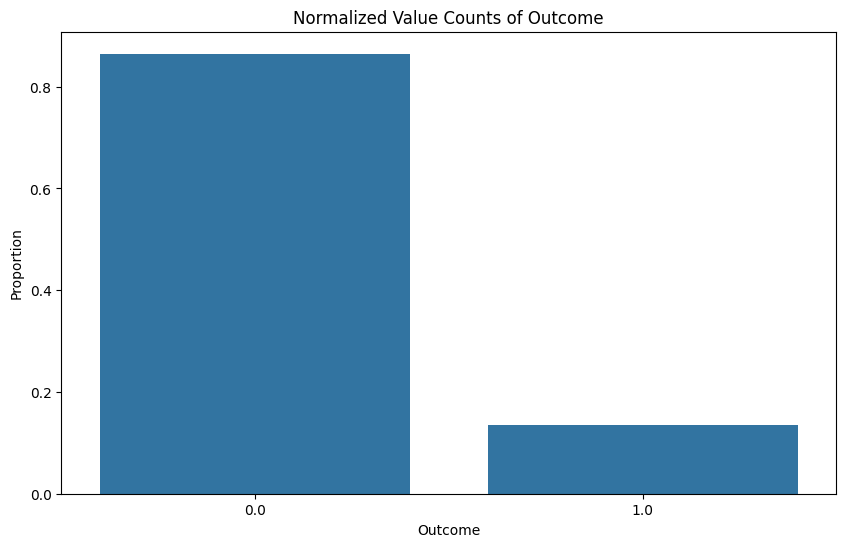

In [14]:
normalized_counts = df["outcome"].value_counts(normalize=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=normalized_counts.index, y=normalized_counts.values)
plt.title('Normalized Value Counts of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Proportion')
plt.show()

In [15]:
df_features = df.drop(columns=['outcome'])

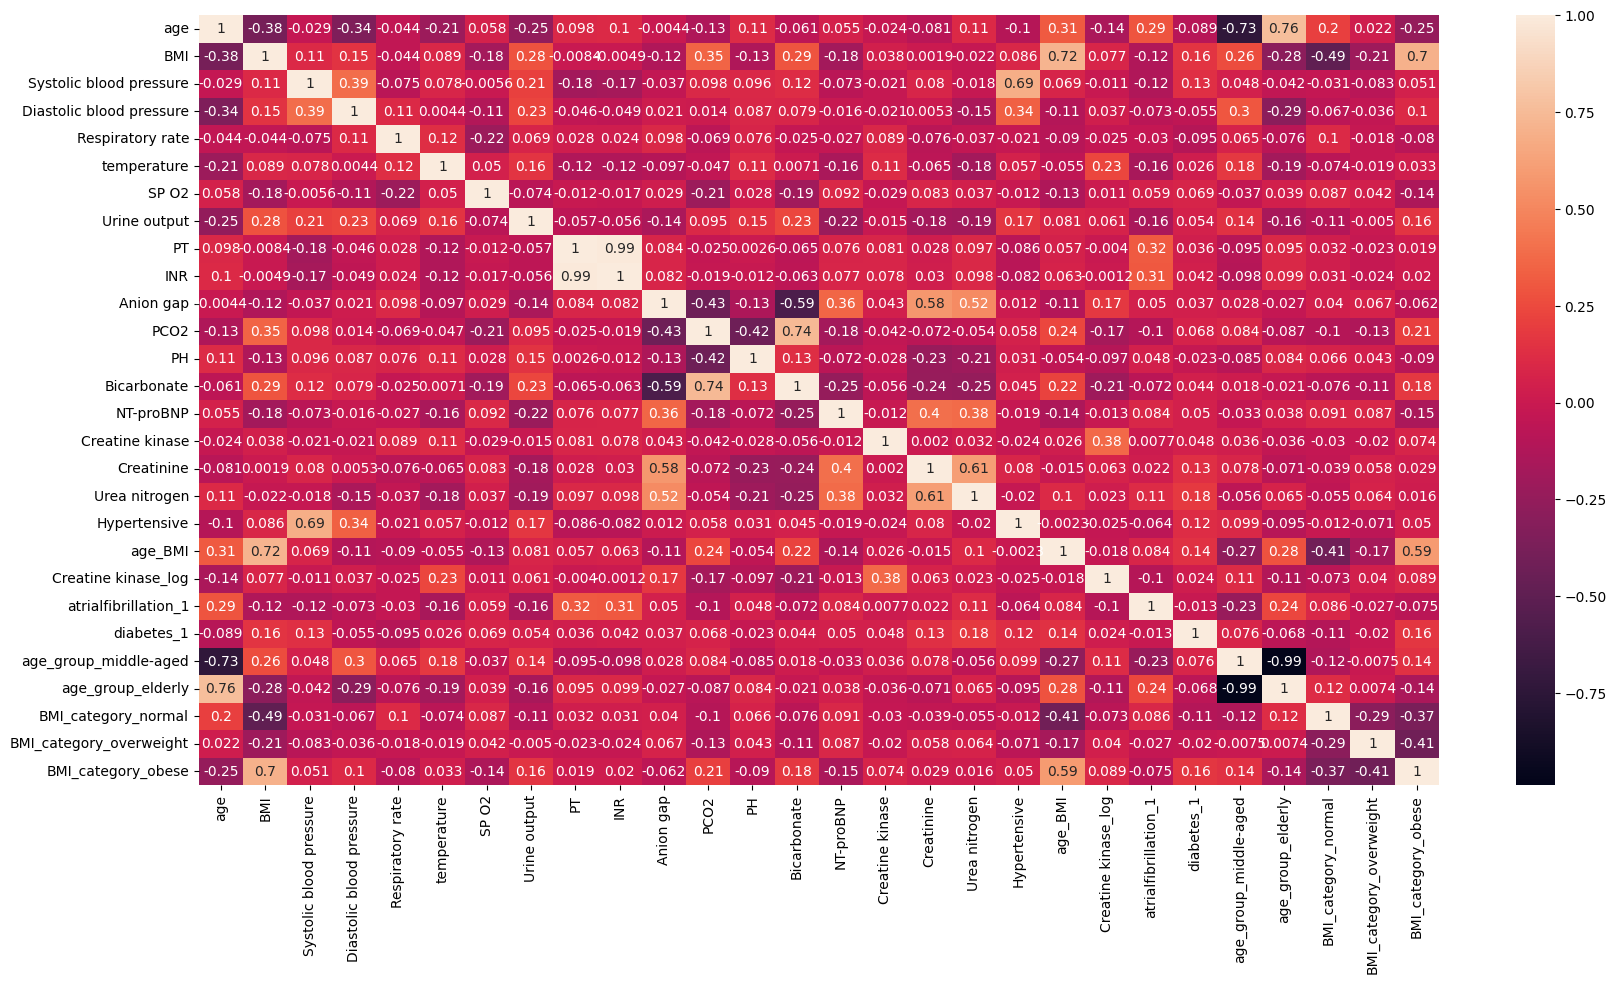

In [16]:
# plot the heatmap to check for Multicollinearity
plt.figure(figsize=(20, 10))  
sns.heatmap(df_features.corr(), annot=True)
plt.show()

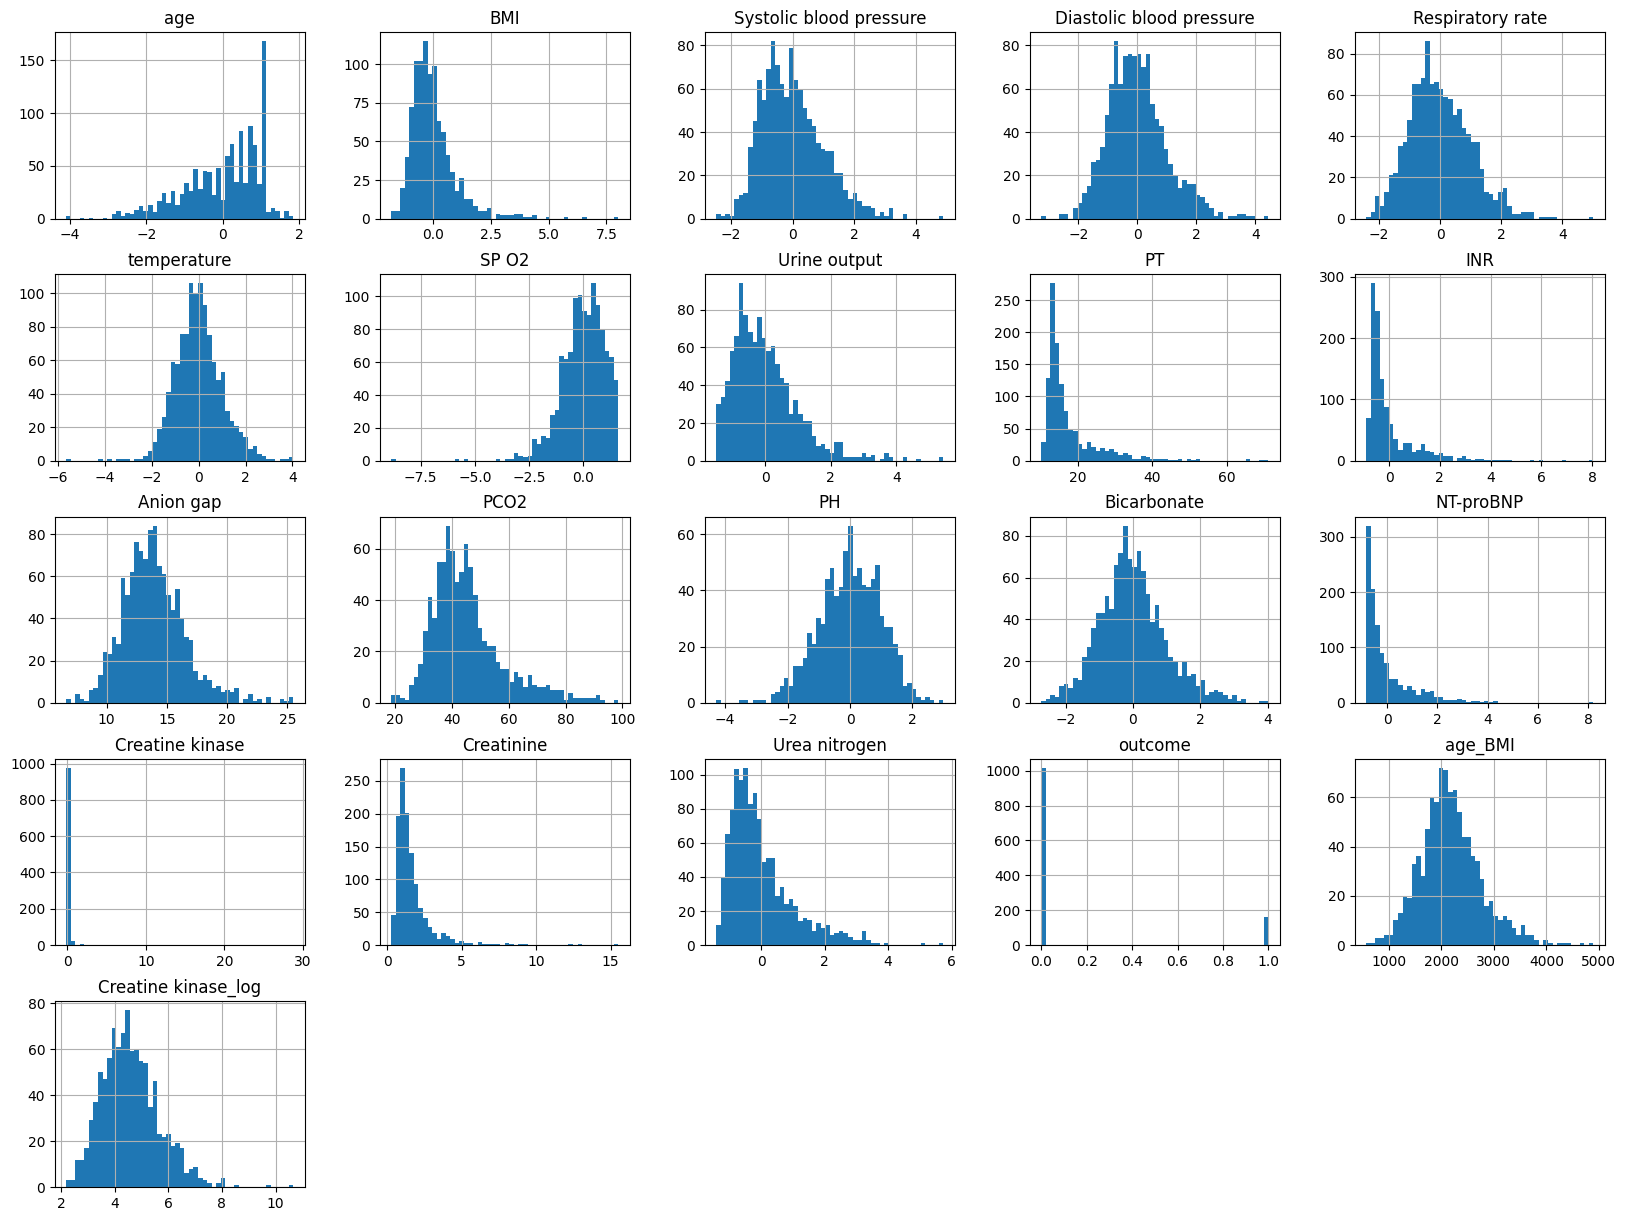

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show();

In [18]:
target_correlation = df.corr()

target_correlation["outcome"].sort_values(ascending=False)

outcome                     1.000000
Anion gap                   0.229676
Urea nitrogen               0.203024
INR                         0.144444
PT                          0.140299
NT-proBNP                   0.121075
Respiratory rate            0.117015
atrialfibrillation_1        0.100975
Creatine kinase             0.076656
age                         0.064510
Creatinine                  0.046717
age_group_elderly           0.032525
Creatine kinase_log         0.014424
BMI_category_overweight     0.008752
BMI_category_normal        -0.005249
age_BMI                    -0.019846
age_group_middle-aged      -0.035927
PCO2                       -0.049517
diabetes_1                 -0.049997
BMI                        -0.062086
Hypertensive               -0.068562
SP O2                      -0.071189
Diastolic blood pressure   -0.087403
temperature                -0.092861
BMI_category_obese         -0.096868
Systolic blood pressure    -0.132857
PH                         -0.150611
U

## Build the model

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
import numpy as np
import mlflow.sklearn

In [20]:
# Example of loading data (replace with your data source)
data = pd.read_csv('../data/processed_data.csv')
data = data.dropna(subset=['outcome'])

# Separate features and target variable
X = data.drop('outcome', axis=1)
y = data['outcome']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(exclude=['object']).columns

# Create preprocessing pipelines
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore')), 
])

# Combine pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)

# Define hyperparameter space for each model
def objective(params):
    model_name = params['model']
    if model_name == 'Logistic Regression':
        model = LogisticRegression(max_iter=int(params['max_iter']))
    elif model_name == 'K-Nearest Neighbors':
        model = KNeighborsClassifier(n_neighbors=int(params['n_neighbors']))
    elif model_name == 'Naive Bayes':
        model = GaussianNB()
    else:
        return {'loss': np.inf, 'status': STATUS_OK}

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')
    
    # Log model and metrics
    with mlflow.start_run() as run:
        mlflow.set_tag("model", model_name)
        mlflow.log_param("model_type", model_name)
        if model_name == 'Logistic Regression':
            mlflow.log_param("max_iter", params['max_iter'])
        elif model_name == 'K-Nearest Neighbors':
            mlflow.log_param("n_neighbors", params['n_neighbors'])
        mlflow.sklearn.log_model(pipeline, f"{model_name}_model")
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
    
    return {'loss': -accuracy, 'status': STATUS_OK}

# Hyperopt search space
space = hp.choice('classifier_type', [
    {
        'model': 'Logistic Regression',
        'max_iter': hp.choice('max_iter', [1000, 2000, 4000, 8000])
    },
    {
        'model': 'K-Nearest Neighbors',
        'n_neighbors': hp.choice('n_neighbors', [3, 5, 7, 9])
    },
    {
        'model': 'Naive Bayes'
    }
])

# Optimize each model's hyperparameters
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

print("Best parameters found: ", best)



  0%|          | 0/20 [00:00<?, ?trial/s, best loss=?]

2024/08/11 00:52:05 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



  5%|▌         | 1/20 [00:04<01:24,  4.43s/trial, best loss: -0.8441926345609065]

2024/08/11 00:52:06 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 10%|█         | 2/20 [00:06<00:51,  2.84s/trial, best loss: -0.8441926345609065]

2024/08/11 00:52:08 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 15%|█▌        | 3/20 [00:07<00:39,  2.30s/trial, best loss: -0.8441926345609065]

/home/codespace/.local/share/virtualenvs/In-Hospital-Mortality-Prediction-XdciD8wX/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

2024/08/11 00:52:10 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 20%|██        | 4/20 [00:09<00:35,  2.20s/trial, best loss: -0.8611898016997167]

2024/08/11 00:52:12 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 25%|██▌       | 5/20 [00:11<00:30,  2.03s/trial, best loss: -0.8611898016997167]

/home/codespace/.local/share/virtualenvs/In-Hospital-Mortality-Prediction-XdciD8wX/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

2024/08/11 00:52:14 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 30%|███       | 6/20 [00:13<00:27,  1.98s/trial, best loss: -0.8611898016997167]

2024/08/11 00:52:16 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 35%|███▌      | 7/20 [00:15<00:24,  1.92s/trial, best loss: -0.8611898016997167]

/home/codespace/.local/share/virtualenvs/In-Hospital-Mortality-Prediction-XdciD8wX/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

2024/08/11 00:52:18 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 40%|████      | 8/20 [00:17<00:23,  1.97s/trial, best loss: -0.8611898016997167]

2024/08/11 00:52:19 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 45%|████▌     | 9/20 [00:19<00:20,  1.89s/trial, best loss: -0.8611898016997167]

2024/08/11 00:52:21 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 50%|█████     | 10/20 [00:20<00:19,  1.90s/trial, best loss: -0.8611898016997167]

2024/08/11 00:52:23 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 55%|█████▌    | 11/20 [00:22<00:16,  1.88s/trial, best loss: -0.8611898016997167]

/home/codespace/.local/share/virtualenvs/In-Hospital-Mortality-Prediction-XdciD8wX/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

2024/08/11 00:52:25 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 60%|██████    | 12/20 [00:24<00:15,  1.88s/trial, best loss: -0.8611898016997167]

2024/08/11 00:52:27 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 65%|██████▌   | 13/20 [00:26<00:12,  1.81s/trial, best loss: -0.8611898016997167]

2024/08/11 00:52:28 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 70%|███████   | 14/20 [00:28<00:10,  1.80s/trial, best loss: -0.8611898016997167]

2024/08/11 00:52:30 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 75%|███████▌  | 15/20 [00:29<00:09,  1.82s/trial, best loss: -0.8611898016997167]

2024/08/11 00:52:32 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 80%|████████  | 16/20 [00:31<00:07,  1.79s/trial, best loss: -0.8611898016997167]

2024/08/11 00:52:34 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 85%|████████▌ | 17/20 [00:33<00:05,  1.80s/trial, best loss: -0.8611898016997167]

/home/codespace/.local/share/virtualenvs/In-Hospital-Mortality-Prediction-XdciD8wX/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(

2024/08/11 00:52:36 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 90%|█████████ | 18/20 [00:35<00:03,  2.00s/trial, best loss: -0.8611898016997167]

2024/08/11 00:52:38 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



 95%|█████████▌| 19/20 [00:37<00:01,  1.91s/trial, best loss: -0.8611898016997167]

2024/08/11 00:52:40 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



100%|██████████| 20/20 [00:39<00:00,  1.97s/trial, best loss: -0.8611898016997167]
Best parameters found:  {'classifier_type': 0, 'max_iter': 0}


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


# Enable MLflow autologging
mlflow.sklearn.autolog()

# Define preprocessing for numerical and categorical data
numeric_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy='mean'))
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, X.select_dtypes(include=['float64']).columns),
        ('cat', categorical_pipeline, X.select_dtypes(include=['object']).columns)
    ]
)

# Define different models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Classifier": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42)
}

# Train and log each model
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Create a pipeline with preprocessing and the model
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        # Train the model
        pipeline.fit(X_train, y_train)

        # Make predictions
        predictions = pipeline.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')
        
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        
        mlflow.sklearn.log_model(pipeline, model_name)

2024/08/11 01:56:45 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
/home/codespace/.local/share/virtualenvs/In-Hospital-Mortality-Prediction-XdciD8wX/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/share/virtualenvs/In-Hospital-Mortality-Prediction-XdciD8wX/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
2024/08/11 01:56:49 WARNING mlflow.models.model: Inp

In [31]:
import mlflow
logged_model = 'runs:/6dd42a06d9b34dd0a37010f9ccd6ff2e/Logistic Regression'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

In [32]:
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: Logistic Regression
  flavor: mlflow.sklearn
  run_id: 6dd42a06d9b34dd0a37010f9ccd6ff2e

In [33]:
Log_reg = mlflow.sklearn.load_model(logged_model)

In [34]:
y_pred = Log_reg.predict(X_test)

In [35]:
y_pred[:10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [2]:
from mlflow.tracking import MlflowClient

MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"

client = MlflowClient(tracking_uri = MLFLOW_TRACKING_URI )

In [3]:
from mlflow.entities import ViewType

runs = client.search_runs(
    experiment_ids = '2',
    filter_string = "",
    run_view_type = ViewType.ACTIVE_ONLY,
    max_results = 5,
    order_by = ["metrics.recall ASC"]
)

In [4]:
runs

[<Run: data=<RunData: metrics={'accuracy': 0.8130311614730878,
  'f1_score': 0.7596759915014164,
  'precision': 0.7128924260423849,
  'recall': 0.8130311614730878}, params={'model_type': 'K-Nearest Neighbors', 'n_neighbors': '3'}, tags={'mlflow.log-model.history': '[{"run_id": "3d1a872be4094a54aa57cf2483fb3025", '
                              '"artifact_path": "K-Nearest Neighbors_model", '
                              '"utc_time_created": "2024-08-11 '
                              '00:52:14.578200", "flavors": {"python_function": '
                              '{"model_path": "model.pkl", "predict_fn": '
                              '"predict", "loader_module": "mlflow.sklearn", '
                              '"python_version": "3.12.3", "env": {"conda": '
                              '"conda.yaml", "virtualenv": "python_env.yaml"}}, '
                              '"sklearn": {"pickled_model": "model.pkl", '
                              '"sklearn_version": "1.5.1", '
        

In [5]:
for run in runs:
    print(f"run id: {run.info.run_id}, recall: {run.data.metrics['accuracy']:.4f}")

run id: 3d1a872be4094a54aa57cf2483fb3025, recall: 0.8130
run id: b7cb1e8fd9e94922be00cf1a28cb3bb5, recall: 0.8414
run id: d4d6b06a71ff4bc5b0af8dcd7c85fe79, recall: 0.8442
run id: bc9bfc48114a4c4996a13860c08c666a, recall: 0.8442
run id: 923360240771406dac37320fb9433f15, recall: 0.8442


In [7]:
import mlflow

In [12]:
run_id = "3d1a872be4094a54aa57cf2483fb3025"
model_uri = f"runs://{run_id}/model"

mlflow.register_model(model_uri= model_uri, name = "logistic-regressor")

Registered model 'logistic-regressor' already exists. Creating a new version of this model...


MlflowException: Run 'model' not found

In [13]:
model_uri

'runs://3d1a872be4094a54aa57cf2483fb3025/model'